In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [ ]:
path = '/content/drive/MyDrive/Dataset/'
data_dir = pathlib.Path(path)

In [ ]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Non_Demented', 'Very_Mild_Demented']], dtype='<U18')

In [ ]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

5440

In [ ]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

In [ ]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

In [ ]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 5440 files belonging to 2 classes.
Using 4352 files for training.
Found 5440 files belonging to 2 classes.
Using 1088 files for validation.


In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [ ]:
epochs = 9
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

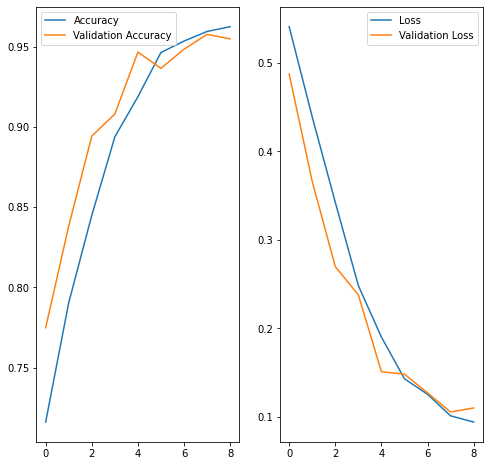

In [ ]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import keras
import keras.utils as image
import tensorflow as tf


model = tf.keras.models.load_model('/content/drive/MyDrive/model2.hdf5')



# Load the image and preprocess it
img = image.load_img('/content/ADNI_002_S_4521_MR_Axial_T2-Star__br_raw_20160324122521837_22_S402609_I662501.jpg', target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/.255




# Make a prediction on the image
prediction = model.predict(img_tensor)

# Get the class with the highest probability

prediction = np.argmax(prediction)
prediction


1/1 [==============================] - 0s 117ms/step


0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
